In [1]:
from matplotlib import pyplot as plt
import cv2 
import numpy as np
import random

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log


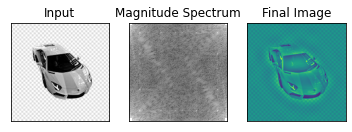

Result: Not Blurry


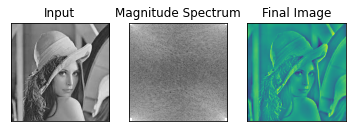

Result: Not Blurry


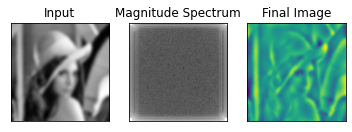

Result: Blurry


In [43]:
def detect_blur_fft(image, size=5, thresh=52, vis=True):
  # calculating the center
  (h, w) = image.shape
  (cX, cY) = (int(w / 2.0), int(h / 2.0))

  # computing the FFT to find the frequency transform
  # then shift the zero frequency component to the center
  fft = np.fft.fft2(image)
  fftShift = np.fft.fftshift(fft)

  # zero-out the center of the FFT shift to remove low frequencies
  fftShift[cY - size:cY + size, cX - size:cX + size] = 0
  # applying the inverse shift such that the DC component once again becomes the top-left
  fftShift = np.fft.ifftshift(fftShift)
  # applying the inverse FFT to get the image in spatial domain
  final_img = np.fft.ifft2(fftShift)
  final_img_show = final_img.copy()
  final_img_show = np.real(final_img_show)

  # check to see if we are visualizing our output
  if vis:
    # compute the magnitude spectrum of the transform
    magnitude = 20 * np.log(np.abs(fftShift))
    # display the original input image
    (fig, ax) = plt.subplots(1, 3, )
    ax[0].imshow(image, cmap="gray")
    ax[0].set_title("Input")
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    # display the magnitude image
    ax[1].imshow(magnitude, cmap="gray")
    ax[1].set_title("Magnitude Spectrum")
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    # display the final image
    ax[2].imshow(final_img_show)
    ax[2].set_title("Final Image")
    ax[2].set_xticks([])
    ax[2].set_yticks([])
    # show our plots
    plt.show()

  # compute the magnitude spectrum of the reconstructed image
  magnitude = 20 * np.log(np.abs(final_img))
  mean = np.mean(magnitude)
  # the image will be considered "blurry" if the mean value of the
  # magnitudes is less than the threshold value
  return (mean, mean <= thresh)


def analyze_blur_res(res):
  if res:
    print("Result: Blurry")
  else:
    print("Result: Not Blurry")

img1 = cv2.imread('./lambo.jpg', 0)
(mean_res1, blur_res1) = detect_blur_fft(img1)
analyze_blur_res(blur_res1)

img2 = cv2.imread('./lena.jpg', 0)
(mean_res2, blur_res2) = detect_blur_fft(img2)
analyze_blur_res(blur_res2)

img3 = cv2.GaussianBlur(img2, (21, 21), 0)
(mean_res3, blur_res3) = detect_blur_fft(img3)
analyze_blur_res(blur_res3)